In [1]:
import torch
# import libraries
from managers.shiyongren import Manager
from models.shiyongren import D2NNmodel
from helper import *

In [2]:
n_layers = 4
n_size_per_layer = 400
distance_list = torch.tensor([29.5, 29.5, 29.5, 71]) * 1e-3
pixel_pitch = 8e-6
lambd_list = torch.tensor([491e-9, 660e-9])
n_multiplexing = len(lambd_list)
n_padding = 200
lr = 1e-2
batch_size = 12
whether_load_model = False
load_model_name = 'saved_model/shiyongren.pth'
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
load_dic = [
    {'path':'input_field_lamda_12.mat', 'vari_name':'U_load'},
    {'path':'output_filed_lamda_12.mat', 'vari_name':'Y_load'}
]
dataloaders = shiyong_loader(load_dic, batch_size)

In [4]:
model = D2NNmodel(pixel_pitch, distance_list, n_padding, device, lambd_list, n_size_per_layer, 0)

In [5]:
loss_fn = nn.CrossEntropyLoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=lr)
manager = Manager(model, loss_fn, optimizer, n_multiplexing)
manager.set_loaders(dataloaders, None)
# tracking, fig = manager.lr_range_test(dataloaders[0], end_lr=1e8, num_iter=100)
if whether_load_model:
    manager.load_checkpoint(load_model_name, None)

In [12]:
manager.train(300)

In [7]:
# manager.eff()

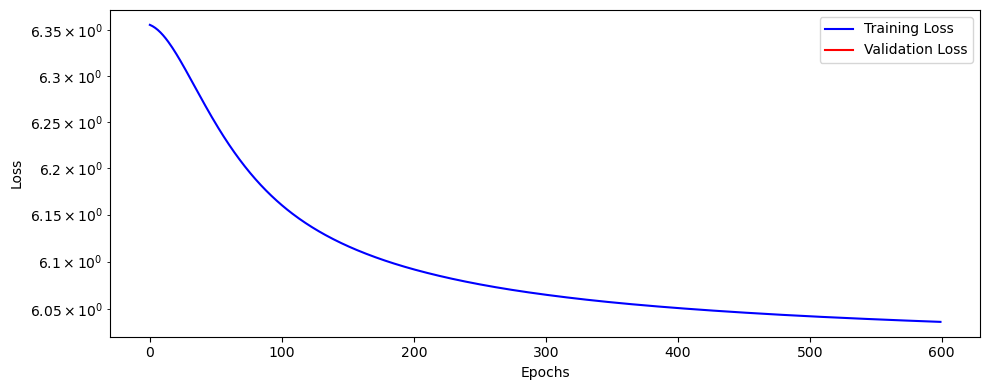

In [13]:
fig_l = manager.plot_losses()

In [ ]:
# manager.save_checkpoint('saved_model/shiyongren.pth')

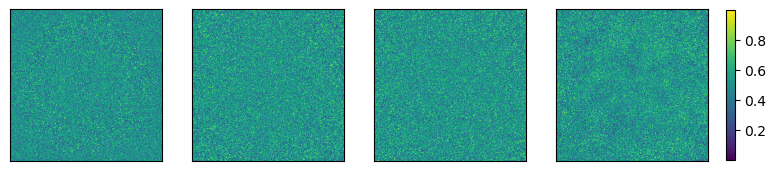

In [15]:
layers_name = ['modulation_1', 'modulation_2', 'modulation_3', 'modulation_4']
fig_voltage = manager.visualize_voltage_mask(layers_name)

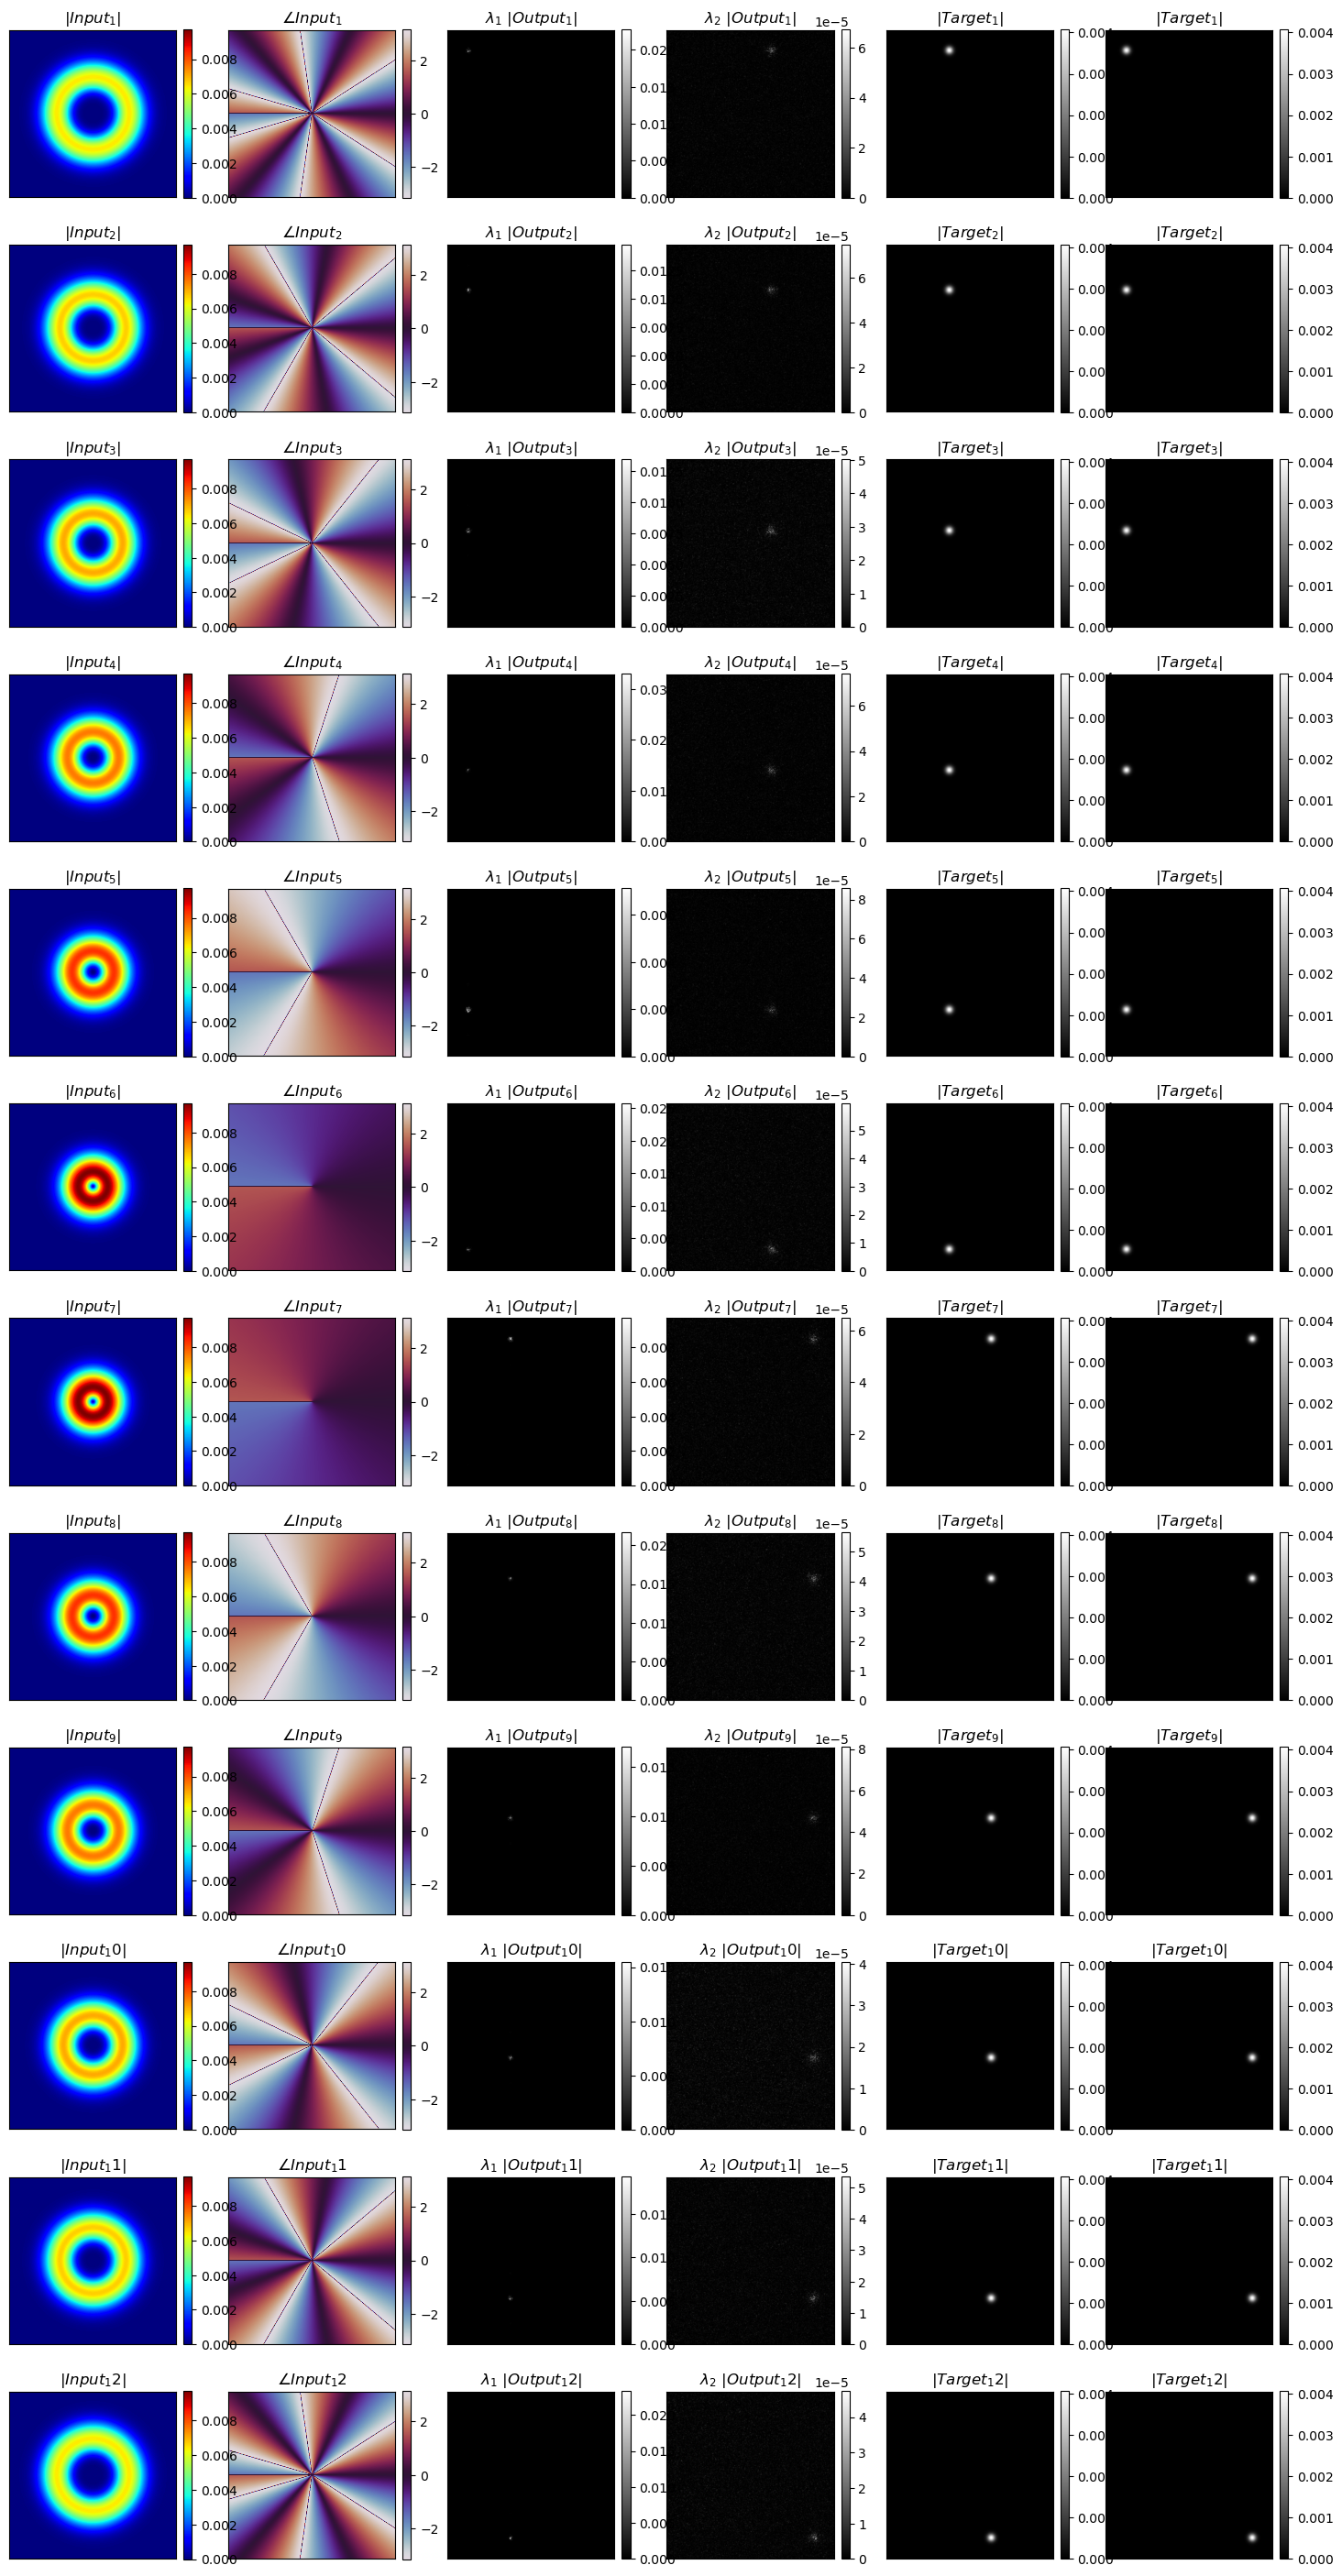

In [14]:
layers_to_hook = ['detect']
outputs = manager.get_output(layers_to_hook)
fig_1 = manager.figure_1(outputs)

In [16]:
print(outputs.sum(axis=(1, 2)))

[0.66354316 0.6623554  0.64565593 0.64242256 0.63729525 0.6550519
 0.6488387  0.6487674  0.6400223  0.64709425 0.6587382  0.66956806
 0.16584042 0.17065425 0.17621869 0.18315108 0.18691753 0.19128056
 0.19025971 0.1849236  0.18212172 0.17464438 0.17085867 0.1656804 ]


In [ ]:
# To be continued ...

In [ ]:
import numpy as np
rows = np.arange(50, 360, 60)
cols = np.arange(50, 360, 100)
x, y = np.meshgrid(rows, cols)
centerss = zip(x.reshape(-1), y.reshape(-1))
for center in centerss:
    print(center)

In [ ]:
import matplotlib.pyplot as plt

aa = model.detect.gaussians[:, :, 5]
fig, ax = plt.subplots()
ax.imshow(aa)
plt.show()